# Preparation

Preparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `SC_HW1_bank_data.csv` sebelum tahap pemodelan :
1. Import Library
2. Input Dataset
3. Preprocessing
4. Train-Test Split

## Import Library

In [1]:
import pandas as pd
import numpy as np

## Input Dataset

In [2]:
#Membaca data dan memasukkannya ke dalam bentuk Pandas Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/SC_HW1_bank_data.csv')

In [3]:
#Jalankan code untuk mengecek nama kolom yang tersedia
df.columns

Index(['RowNumber', 'CustomerId', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.head()

,RowNumber,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Hilangkan kolom yang dirasa tidak relevan dengan model (contoh: ID). None dapat diisi dengan nama-nama kolom yang akan digunakan.
#Contoh df = df[['X1','X2', 'Y']].copy()

#START CODE
df = df[['Geography',	'Gender',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary',	'Exited']].copy()
df

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geography        10000 non-null  object 
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


## Preprocessing

In [7]:
#Lakukan One-Hot Encoder untuk data categorical, dengan fungsi pandas get_dummies

#START CODE
df = pd.get_dummies(df,columns=['Geography', 'Gender'], drop_first = True)
df

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [8]:
#Pisahkan mana X (feature) dengan Y,
#Y adalah kolom "Exited"

#START CODE
X = df.drop('Exited',axis = 1)
y = df['Exited']

In [9]:
X.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,42,2,0.00,1,1,1,101348.88,0,0,0
1,41,1,83807.86,1,0,1,112542.58,0,1,0
2,42,8,159660.80,3,1,0,113931.57,0,0,0
3,39,1,0.00,2,0,0,93826.63,0,0,0
4,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [11]:
#Lakukan Scaler dan/atau Noermalisasi jika diperlukan
from sklearn.preprocessing import MinMaxScaler

#START CODE
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)

In [12]:
#Ini digunakan jika dilakukan scaler/Normalisas. Jika tidak, code ini bisa dilewat dan diganti dengan code yang ada di dalam komen
X_transform = pd.DataFrame(X_transform, columns = X.columns)
#X_transform = X.copy()

## Train-Test Split

In [13]:
#Split menjadi train dan test dengan test_size 25%
#Tidak perlu mengubah code ini

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size = 0.25,random_state = 123)

# Modeling

## Model1

### Soal :
Jelaskan secara Singkat Model pertama yang digunakan!

In [14]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator= model1,
             param_grid= params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(X_train,y_train)
grid.best_params_

{'C': 0.5, 'tol': 0.01}

Model logistic regression adalah salah satu jenis model statistik yang digunakan untuk memodelkan hubungan antara variabel dependen biner (dua kategori) dan satu atau lebih variabel independen. Tujuannya adalah untuk memprediksi probabilitas kejadian salah satu dari dua kategori berdasarkan nilai-nilai variabel independen yang diberikan.

Pada model1 yaitu menggunakan model logistic regression yang merupakan salah satu jenis model statistik yang digunakan untuk memodelkan hubungan antara variabel dependen biner (dichotomous) dengan satu atau lebih variabel independen (predictor) yang dapat berupa variabel kategorikal atau kontinu.

In [15]:
#lakukan evaluasi dengan beberapa maetric di bawah ini
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1983
           1       0.66      0.20      0.31       517

    accuracy                           0.81      2500
   macro avg       0.74      0.59      0.60      2500
weighted avg       0.79      0.81      0.77      2500


[[1929   54]
 [ 413  104]]

0.8132


## Model2
### Soal :
Jelaskan secara Singkat Model ke-2 yang digunakan!

In [25]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
params2 = {'n_neighbors' : [3, 5, 7, 9, 13]}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator= model2,
             param_grid= params2,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(X_train,y_train)
grid.best_params_

{'n_neighbors': 7}

Model K-Neighbors Classifier (KNN) adalah algoritma pembelajaran mesin yang digunakan untuk masalah klasifikasi. Prinsip dasar KNN adalah memprediksi label atau kategori dari suatu data baru berdasarkan mayoritas label data tetangga terdekatnya.

Pada model2 yaitu menggunakan model K-Neighbors yang mengacu pada model yang berhubungan dengan algoritma K-Nearest Neigbors(K-NN).

In [24]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1983
           1       0.68      0.33      0.45       517

    accuracy                           0.83      2500
   macro avg       0.76      0.65      0.67      2500
weighted avg       0.81      0.83      0.81      2500


[[1903   80]
 [ 345  172]]

0.83


## Model3
### Soal :
Jelaskan secara Singkat Model ke-3 yang digunakan!

In [29]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
params3 = {'criterion' : ['gini', 'entropy'],
           'max_depth' : [8, 12, 14],
           'random_state' : [24, 42],
           'n_estimators' : [10, 50, 100]}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator= model3,
             param_grid= params3,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'n_estimators': 100,
 'random_state': 24}

Model Random Forest adalah algoritma pembelajaran mesin yang digunakan untuk tugas-tugas seperti klasifikasi dan regresi. Ini adalah bentuk ensemble learning yang menggabungkan beberapa pohon keputusan (decision trees) menjadi "hutan" untuk meningkatkan kinerja dan ketahanan model.

Pada model3 menggunakan model Random Forest yang merupakan jenis model ensemble dalam machine learning yang digunakan untuk tugas klasifikasi dan regresi. (menggunakan decision trees)

In [30]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1983
           1       0.78      0.47      0.59       517

    accuracy                           0.86      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.86      0.86      0.85      2500


[[1916   67]
 [ 274  243]]

0.8636


## Tarik Kesimpulan Model Mana yang terbaik beserta alasannya

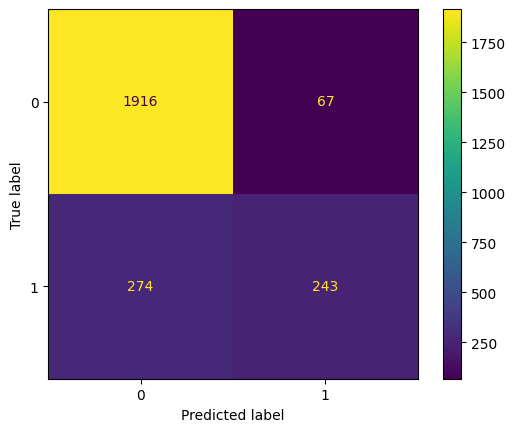

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Dari ketiga percobaan model diatas, diperoleh bahwasanya model dengan algoritma "Random Forest" merupakan model terbaik untuk memprediksi pelanggan bank. Hal itu dikarenakan pada algoritma random forest memiliki akurasi sebesar 86,24%.